# **Which technology usage patterns have the strongest impact on mental health?**



## **1. Data Acquisition** 

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
csv_file = "data/mental_health_and_technology_usage_2024.csv"
csv_data = pd.read_csv(csv_file)

# Display the first few rows of the dataframe to understand its structure
csv_data.head()


,User_ID,Age,Gender,Technology_Usage_Hours,Social_Media_Usage_Hours,Gaming_Hours,Screen_Time_Hours,Mental_Health_Status,Stress_Level,Sleep_Hours,Physical_Activity_Hours,Support_Systems_Access,Work_Environment_Impact,Online_Support_Usage
0,USER-00001,23,Female,6.57,6.00,0.68,12.36,Good,Low,8.01,6.71,No,Negative,Yes
1,USER-00002,21,Male,3.01,2.57,3.74,7.61,Poor,High,7.28,5.88,Yes,Positive,No
2,USER-00003,51,Male,3.04,6.14,1.26,3.16,Fair,High,8.04,9.81,No,Negative,No
3,USER-00004,25,Female,3.84,4.48,2.59,13.08,Excellent,Medium,5.62,5.28,Yes,Negative,Yes
4,USER-00005,53,Male,1.20,0.56,0.29,12.63,Good,Low,5.55,4.00,No,Positive,Yes


## **Data Preparation/Data Cleaning** 


### **Missing Values:** 

### **Different Format:**
 

### **Errors: Case sensitive**
**Note:** There are no case sensitive errors in the whole dataset.


#### **Gender**


In [65]:
print(csv_data["Gender"].unique())

valid_values = ["Male", "Female", "Other"]
invalid_entries = csv_data[~csv_data["Gender"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Gender"].head())


['Female' 'Male' 'Other']
Case-sensitive invalid entries:
Series([], Name: Gender, dtype: object)


#### **Mental health status**

In [66]:
print(csv_data["Mental_Health_Status"].unique())

valid_values = ["Good", "Poor", "Fair", "Excellent"]
invalid_entries = csv_data[~csv_data["Mental_Health_Status"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Mental_Health_Status"].head())


['Good' 'Poor' 'Fair' 'Excellent']
Case-sensitive invalid entries:
Series([], Name: Mental_Health_Status, dtype: object)


#### **Stress level**

In [67]:
print(csv_data["Stress_Level"].unique())

valid_values = ["Low", "High", "Medium"]
invalid_entries = csv_data[~csv_data["Stress_Level"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Stress_Level"].head())

['Low' 'High' 'Medium']
Case-sensitive invalid entries:
Series([], Name: Stress_Level, dtype: object)


#### **Support systems access**

In [68]:
print(csv_data["Support_Systems_Access"].unique())

valid_values = ["No", "Yes"]
invalid_entries = csv_data[~csv_data["Support_Systems_Access"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Support_Systems_Access"].head())

['No' 'Yes']
Case-sensitive invalid entries:
Series([], Name: Support_Systems_Access, dtype: object)


#### **Work environment impact**

In [69]:
print(csv_data["Work_Environment_Impact"].unique())

valid_values = ["Negative", "Positive", "Neutral"]
invalid_entries = csv_data[~csv_data["Work_Environment_Impact"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Work_Environment_Impact"].head())

['Negative' 'Positive' 'Neutral']
Case-sensitive invalid entries:
Series([], Name: Work_Environment_Impact, dtype: object)


#### **Online support usage**

In [71]:
print(csv_data["Online_Support_Usage"].unique())

valid_values = ["No", "Yes"]
invalid_entries = csv_data[~csv_data["Online_Support_Usage"].isin(valid_values)]
print("Case-sensitive invalid entries:")
print(invalid_entries["Online_Support_Usage"].head())

['Yes' 'No']
Case-sensitive invalid entries:
Series([], Name: Online_Support_Usage, dtype: object)


### **Remove duplicates in identifiers**
**Note:** There are no duplicates in the User_ID column.

In [73]:
is_unique = csv_data["User_ID"].is_unique
print("Are all User_IDs unique?", is_unique)


Are all User_IDs unique? True


### **Outliers:**
**Note:** The IQR factor was intentionally reduced to 0.4 to identify even slight deviations from the central range as outliers. This allows for a more sensitive analysis. These are not classical outliers (which use a factor of 1.5), but rather borderline observations.


Outliers in 'Technology_Usage_Hours':
      Technology_Usage_Hours
4                       1.20
22                      1.27
27                      1.16
31                     11.80
32                     11.51
...                      ...
9956                   11.50
9962                   11.73
9967                    1.43
9977                    1.19
9993                   11.58

[1085 rows x 1 columns]

Outliers in 'Social_Media_Usage_Hours':
      Social_Media_Usage_Hours
15                        0.21
26                        0.06
54                        7.83
55                        7.78
79                        0.37
...                        ...
9943                      7.64
9950                      7.64
9954                      0.05
9964                      7.86
9974                      0.32

[970 rows x 1 columns]

Outliers in 'Gaming_Hours':
      Gaming_Hours
5             0.11
8             0.08
25            0.19
47            4.85
78            4.94
...     

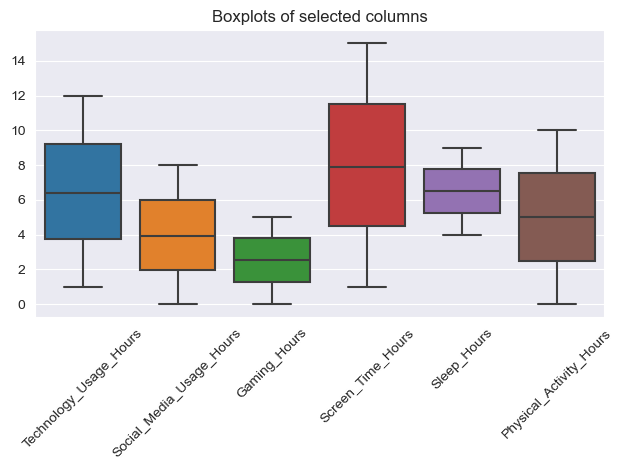

In [74]:
columns = [
    "Technology_Usage_Hours",
    "Social_Media_Usage_Hours",
    "Gaming_Hours",
    "Screen_Time_Hours",
    "Sleep_Hours",
    "Physical_Activity_Hours"
]

# copy of the data frame
clean_data = csv_data.copy()

for col in columns:
    # calculate IQR
    Q1 = csv_data[col].quantile(0.25)
    Q3 = csv_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # calculate borders
    lower_bound = Q1 - 0.4 * IQR
    upper_bound = Q3 + 0.4 * IQR

    # select and print outliers
    outliers = csv_data[(csv_data[col] < lower_bound) | (csv_data[col] > upper_bound)]
    print(f"\nOutliers in '{col}':")
    print(outliers[[col]])

    # delete outliers from the clean_data dataset
    #clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]

    
# Boxplots for all chosen columns
sns.boxplot(data=csv_data[columns])
plt.title("Boxplots of selected columns")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

#print("Dataset without outliers:")
#print(clean_data.head())